In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2
import random
from datetime import datetime

In [2]:
df_1 = pd.read_csv('crime.csv')
df_1.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [23]:
categories = df_1['Category'].unique().tolist()
descripts = df_1['Descript'].unique().tolist()
daysOfWeek = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
districts = df_1['PdDistrict'].unique().tolist()
resolutions = df_1['Resolution'].unique().tolist()

In [51]:
df_2 = df_1.copy()

df_2['month'] = 'unknown'
for i in range(len(df_1)):
    df_2.loc[i,'Category'] = categories.index(df_1.loc[i,'Category']) + 1
    df_2.loc[i,'Descript'] = descripts.index(df_1.loc[i,'Descript']) + 1
    df_2.loc[i,'DayOfWeek'] = daysOfWeek.index(df_1.loc[i,'DayOfWeek']) + 1
    df_2.loc[i,'PdDistrict'] = districts.index(df_1.loc[i,'PdDistrict']) + 1
    df_2.loc[i,'Resolution'] = resolutions.index(df_1.loc[i,'Resolution']) + 1
    
    date_format = '%Y-%m-%d %H:%M:%S'
    date = datetime.strptime(df_1.loc[i,'Dates'], date_format)
    df_2.loc[i,'month'] = date.month

    
df_2['Resolution'] = df_2['Resolution'].astype(int)
df_2['PdDistrict'] = df_2['PdDistrict'].astype(int)
df_2['DayOfWeek'] = df_2['DayOfWeek'].astype(int)
df_2['Descript'] = df_2['Descript'].astype(int)
df_2['Category'] = df_2['Category'].astype(int)
df_2['month'] = df_2['month'].astype(int)

In [52]:
df_2.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,city,month
0,2015-05-13 23:53:00,1,1,4,1,1,OAK ST / LAGUNA ST,-122.425892,37.774599,San Francisco,5
1,2015-05-13 23:53:00,2,2,4,1,1,OAK ST / LAGUNA ST,-122.425892,37.774599,San Francisco,5
2,2015-05-13 23:33:00,2,2,4,1,1,VANNESS AV / GREENWICH ST,-122.424363,37.800414,San Francisco,5
3,2015-05-13 23:30:00,3,3,4,1,2,1500 Block of LOMBARD ST,-122.426995,37.800873,San Francisco,5
4,2015-05-13 23:30:00,3,3,4,2,2,100 Block of BRODERICK ST,-122.438738,37.771541,San Francisco,5


In [53]:
df_2.corr()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,X,Y,month
Category,1.000000,0.371502,-0.000382,0.007643,0.130990,0.000147,-0.005303,0.001152
Descript,0.371502,1.000000,-0.002283,0.003618,0.016371,-0.002041,-0.000506,-0.000600
DayOfWeek,-0.000382,-0.002283,1.000000,0.003016,0.007406,0.003408,0.000245,0.008338
PdDistrict,0.007643,0.003618,0.003016,1.000000,-0.034074,0.181772,0.006265,0.000986
Resolution,0.130990,0.016371,0.007406,-0.034074,1.000000,-0.029146,-0.003649,-0.005203
X,0.000147,-0.002041,0.003408,0.181772,-0.029146,1.000000,0.559338,0.001548
Y,-0.005303,-0.000506,0.000245,0.006265,-0.003649,0.559338,1.000000,0.003307
month,0.001152,-0.000600,0.008338,0.000986,-0.005203,0.001548,0.003307,1.000000


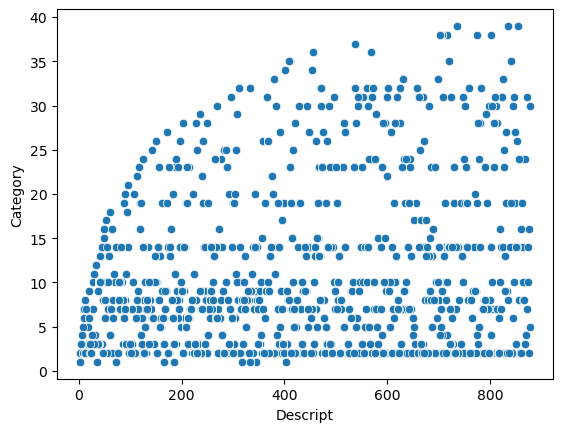

In [59]:
sns.scatterplot(data=df_2, x='Descript', y='Category')
plt.show()